In [1]:
import numpy as np
from twoLayerNet import *
from mnist import load_mnist
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

iters_num=100000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size,1)

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

100%|█████████████████████████████████████████| 100000/100000 [02:24<00:00, 691.81it/s]


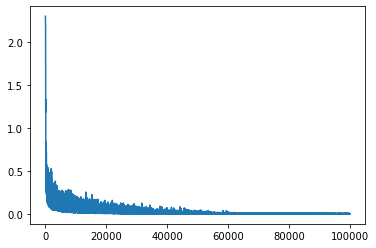

In [4]:
plt.plot(range(100000),train_loss_list)

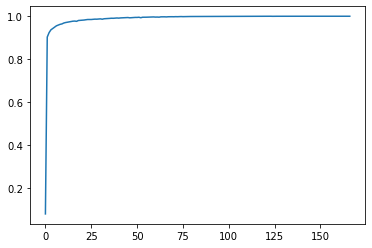

In [6]:
plt.plot(range(167),train_acc_list)

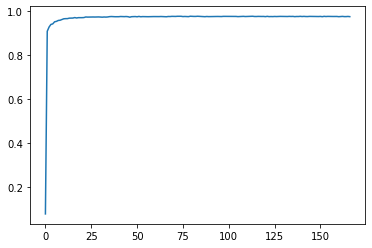

[0.0798, 0.9071, 0.9263, 0.938, 0.9405, 0.9499, 0.9518, 0.956, 0.957, 0.96, 0.9635, 0.9642, 0.9643, 0.9664, 0.9665, 0.9669, 0.9691, 0.9672, 0.9687, 0.9686, 0.9687, 0.9692, 0.9718, 0.9712, 0.9715, 0.9718, 0.9717, 0.9715, 0.972, 0.972, 0.9713, 0.9709, 0.9717, 0.9712, 0.9719, 0.9733, 0.9738, 0.9733, 0.9729, 0.9729, 0.973, 0.9739, 0.9735, 0.9733, 0.9738, 0.9731, 0.9709, 0.9731, 0.9733, 0.9737, 0.9727, 0.9743, 0.9728, 0.9735, 0.9732, 0.9731, 0.973, 0.9733, 0.9739, 0.9736, 0.9734, 0.973, 0.9735, 0.9739, 0.9735, 0.9734, 0.9728, 0.974, 0.9738, 0.9746, 0.9742, 0.9742, 0.9749, 0.9747, 0.9749, 0.9736, 0.9741, 0.9739, 0.9733, 0.9751, 0.9746, 0.9743, 0.9743, 0.975, 0.9744, 0.9741, 0.9735, 0.9731, 0.974, 0.9734, 0.9736, 0.9743, 0.9738, 0.9741, 0.9741, 0.9738, 0.9737, 0.9745, 0.9743, 0.9743, 0.9744, 0.9744, 0.9739, 0.974, 0.9742, 0.9734, 0.9739, 0.9747, 0.9746, 0.9738, 0.9741, 0.9739, 0.9745, 0.975, 0.974, 0.9739, 0.9744, 0.974, 0.9741, 0.9742, 0.9733, 0.9747, 0.9734, 0.9738, 0.9735, 0.9741, 0.9737, 

In [7]:
plt.plot(range(167),test_acc_list)
plt.show()
print(test_acc_list)